In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
import scipy
import wave
import struct
import pylab
import pdb
from scipy.io import wavfile
from IPython.display import Audio

In [ ]:
def downsampler(input_signal, downsamplerate):
    return input_signal[0::downsamplerate]

In [ ]:
filenameWave = 'FDMAMixedAudio12.wav'
BWrange = 5000
rate, data = wavfile.read(filenameWave)

In [ ]:
def showSignal():
    global data
    if len(data.shape) > 1:
        data = data[:, 0]

    Fs = rate
    Ts = 1.0 / Fs
    t = np.arange(0, len(data) * Ts, Ts)
    y = [float(x) for x in data]

    f = open("Signal_in_text.txt", "w")
    for i in range(len(y)):
        f.write(str(y[i]) + " " + str(float(t[i])) + "\n")
    f.close()

    with open('Signal_in_text.txt') as f:
        w = f.read()
    y = []
    t = []
    for x in w.split('\n'):
        if x != '':
            y.append(float(x.split()[0]))
            t.append(float(x.split()[1]))

    n = len(y)
    k = np.arange(n)
    T = n / Fs
    frq = k / T
    fcen = frq[int(len(frq) / 2)]
    frq_DS = frq - fcen
    Y = np.fft.fft(y)
    yinv = np.fft.ifft(Y).real
    Y_DS = np.roll(Y, int(n / 2))
    fcenIndex = (np.abs(frq_DS)).argmin()
    RangeIndex = (np.abs(frq_DS - BWrange)).argmin() - fcenIndex
    RangeIndexMin = fcenIndex - RangeIndex

    if RangeIndexMin < 0:
        RangeIndexMin = 0

    RangeIndexMax = fcenIndex + RangeIndex

    if RangeIndexMax > len(frq_DS) - 1:
        RangeIndexMax = len(frq_DS) - 1

    fig, ax = plt.subplots(2, 1, figsize=(16, 6))
    ax[0].plot(t, y)
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Amplitude')
    ax[1].set_xlabel('Freq (Hz)')
    ax[1].set_ylabel('|Y(freq)|')
    ax[1].plot(frq_DS[RangeIndexMin:RangeIndexMax], abs(Y_DS[RangeIndexMin:RangeIndexMax]), 'r')
    ax[1].set_xlabel('Freq (Hz)')
    ax[1].set_ylabel('|Y(freq)|')
    plt.show()

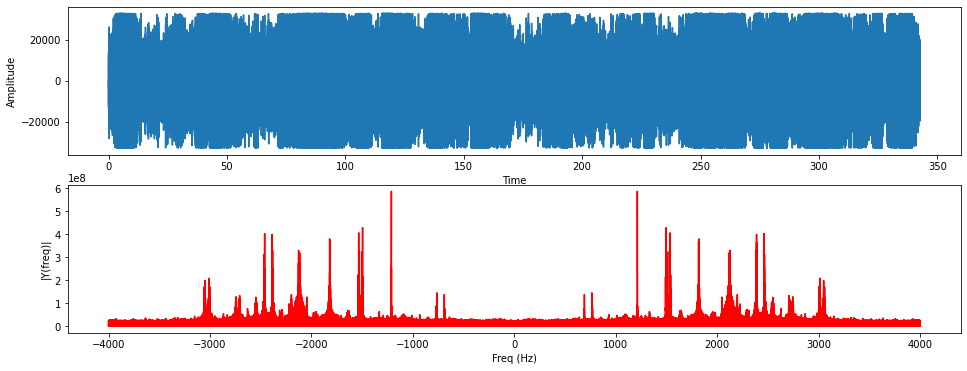

In [ ]:
showSignal()

In [ ]:
BW = input("Enter the five bandwidths: ").split(' ')
FC = input("Enter the five carriers: ").split(' ')

Enter the five bandwidths: 120 100 100 100 100
Enter the five carriers: 3030 1515 1820 2116 2423


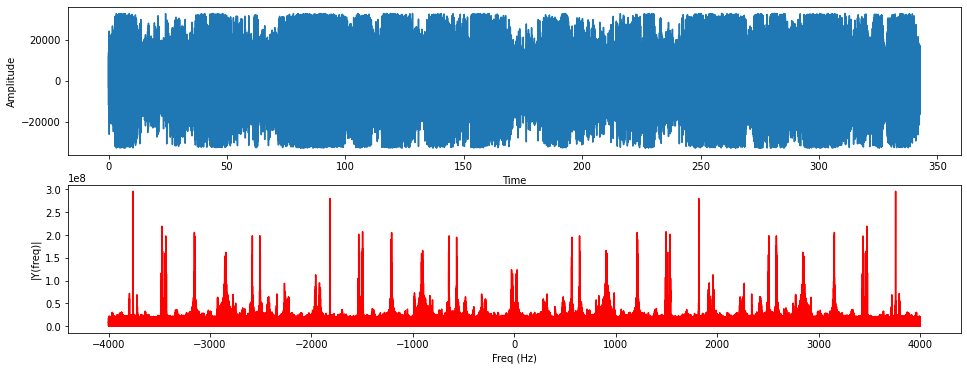

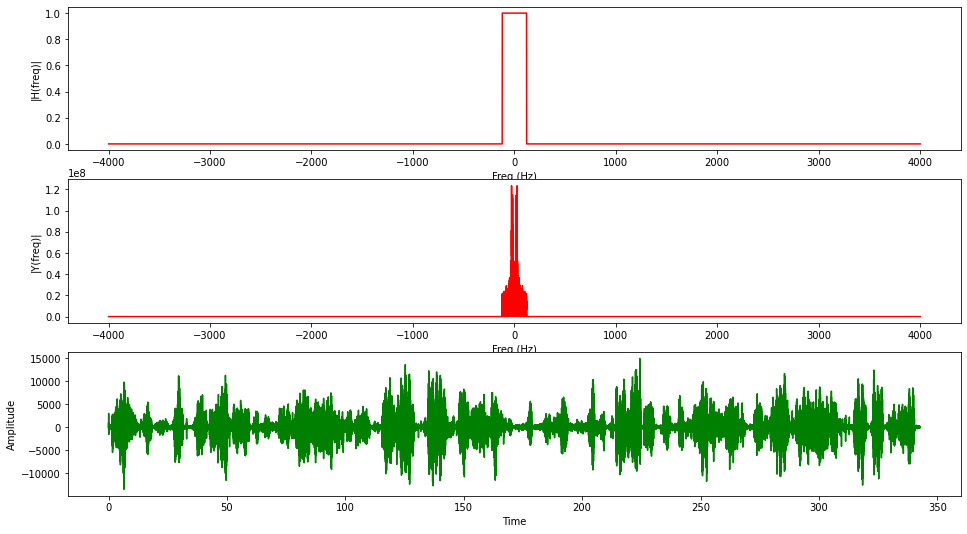



----------------------------------------------------------------------Summary----------------------------------------------------------------------
Duration = 342.7545 sec
Energy of wave (time domain) = 336325942401.028 KJouls
Power of wave (time domain) = 7665.9706754684885 Watts
Energy of wave (DS frequency domain) = 168045457299.16562 KJouls
Power of wave (DS frequency domain) = 3830.30750916394 Watts
Bandwidth of filtered wave = 0.12000134206844813 KHz
Energy of the filtered wave (time domain) = 7189578091.3945 KJouls
Power of the filtered wave (time domain) = 163.8740515351113 Watts
Energy of the filtered wave (DS frequency domain) = 7189578091.394489 KJouls
Power of the filtered wave (DS frequency domain) = 163.87408141693092 Watts
Energy Ratio (filtered / original) = 2.137681690585081%
---------------------------------------------------------------------------------------------------------------------------------------------------




In [ ]:
b = int(BW[0])
fc = int(FC[0])
if len(data.shape) > 1:
    data = data[:, 0]

Fs = rate
Ts = 1.0 / Fs
t = np.arange(0, len(data) * Ts, Ts)
y = [float(x) for x in data] * np.cos(2 * np.pi * fc * t)

f = open("Signal_in_text.txt", "w")
for i in range(len(y)):
    f.write(str(y[i]) + " " + str(float(t[i])) + "\n")
f.close()

with open('Signal_in_text.txt') as f:
    w = f.read()
y = []
t = []
for x in w.split('\n'):
    if x != '':
        y.append(float(x.split()[0]))
        t.append(float(x.split()[1]))

n = len(y)
k = np.arange(n)
T = n / Fs
frq = k / T
fcen = frq[int(len(frq) / 2)]
frq_DS = frq - fcen
Y = np.fft.fft(y)
yinv = np.fft.ifft(Y).real
Y_DS = np.roll(Y, int(n / 2))
fcenIndex = (np.abs(frq_DS)).argmin()
RangeIndex = (np.abs(frq_DS - BWrange)).argmin() - fcenIndex
RangeIndexMin = fcenIndex - RangeIndex

if RangeIndexMin < 0:
    RangeIndexMin = 0

RangeIndexMax = fcenIndex + RangeIndex

if RangeIndexMax > len(frq_DS) - 1:
    RangeIndexMax = len(frq_DS) - 1

fig, ax = plt.subplots(2, 1, figsize=(16, 6))
ax[0].plot(t, y)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
ax[1].plot(frq_DS[RangeIndexMin:RangeIndexMax], abs(Y_DS[RangeIndexMin:RangeIndexMax]), 'r')
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
plt.show()

y = np.array(y)
y_int = y.astype(np.int16)
yinv = np.array(yinv)
yinv_int = yinv.astype(np.int16)

fBWIndex = (np.abs(frq_DS - b)).argmin()
B = frq_DS[fBWIndex]

Mask_DS = np.ones(len(frq_DS))
Yf_DS = np.copy(Y_DS)

for cnt in range(len(frq_DS)):
    if ~(((frq_DS[cnt]) > -1 * b) and ((frq_DS[cnt]) < b)):
        Mask_DS[cnt] = 0
        Yf_DS[cnt] = Y_DS[cnt] * 0

Yf = np.roll(Yf_DS, int(n / 2))
yinv = np.fft.ifft(Yf).real
yinv = np.array(yinv)
yinv_int = yinv.astype(np.int16)

fig, ax = plt.subplots(3, 1, figsize=(16, 9))
ax[0].plot(frq_DS[RangeIndexMin:RangeIndexMax], abs(Mask_DS[RangeIndexMin:RangeIndexMax]), 'r')
ax[0].set_xlabel('Freq (Hz)')
ax[0].set_ylabel('|H(freq)|')
ax[1].plot(frq_DS[RangeIndexMin:RangeIndexMax], abs(Yf_DS[RangeIndexMin:RangeIndexMax]), 'r')
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
ax[2].plot(t, yinv, 'g')
ax[2].set_xlabel('Time')
ax[2].set_ylabel('Amplitude')
plt.show()

Energy_time = np.sum(data.astype(float) ** 2)
Power_time = 1.0 / (2 * data.size + 1) * np.sum(data.astype(float) ** 2) / rate
Energy_freq_DS = np.real(sum(Y_DS * np.conj(Y_DS))) / n
Power_freq_DS = np.real(sum(Y_DS * np.conj(Y_DS))) / (2 * (n ** 2) / Ts)
Energy_time_filtered = np.sum(yinv.astype(float) ** 2)
Power_time_filtered = 1.0 / (2 * yinv.size + 1) * np.sum(yinv.astype(float) ** 2) / rate
Energy_freq_DS_filtered = np.real(sum(Yf_DS * np.conj(Yf_DS))) / n
Power_freq_DS_filtered = np.real(sum(Yf_DS * np.conj(Yf_DS))) / (2 * (n ** 2) / Ts)

print('\n\n' + 70 * '-' + 'Summary' + 70 * '-')
print('Duration = {} sec'.format(len(y) * Ts))
print('Energy of wave (time domain) = {} KJouls'.format(Energy_time / 1000))
print('Power of wave (time domain) = {} Watts'.format(Power_time))
print('Energy of wave (DS frequency domain) = {} KJouls'.format(Energy_freq_DS / 1000))
print('Power of wave (DS frequency domain) = {} Watts'.format(Power_freq_DS))
print('Bandwidth of filtered wave = {} KHz'.format(float(B) / 1000))
print('Energy of the filtered wave (time domain) = {} KJouls'.format(Energy_time_filtered / 1000))
print('Power of the filtered wave (time domain) = {} Watts'.format(Power_time_filtered))
print('Energy of the filtered wave (DS frequency domain) = {} KJouls'.format(Energy_freq_DS_filtered / 1000))
print('Power of the filtered wave (DS frequency domain) = {} Watts'.format(Power_freq_DS_filtered))
print('Energy Ratio (filtered / original) = {}%'.format((Energy_time_filtered / Energy_time) * 100))
print(77 * '-' + 70 * '-' + '\n\n')
yinv = downsampler(yinv, 40)
Audio(yinv, rate=rate)

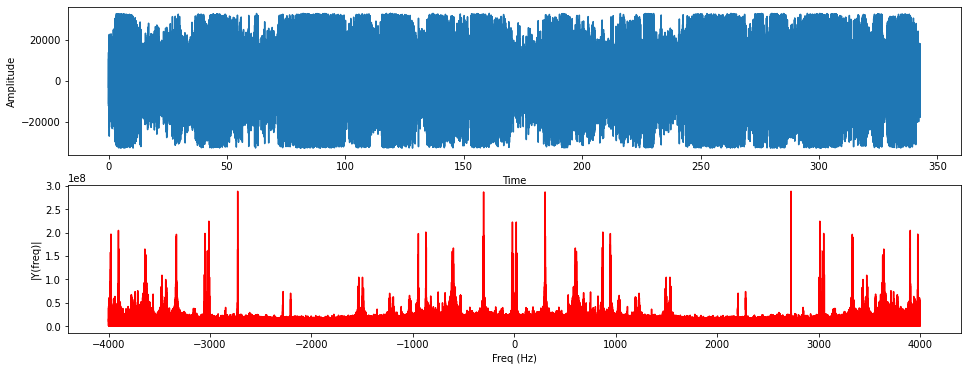

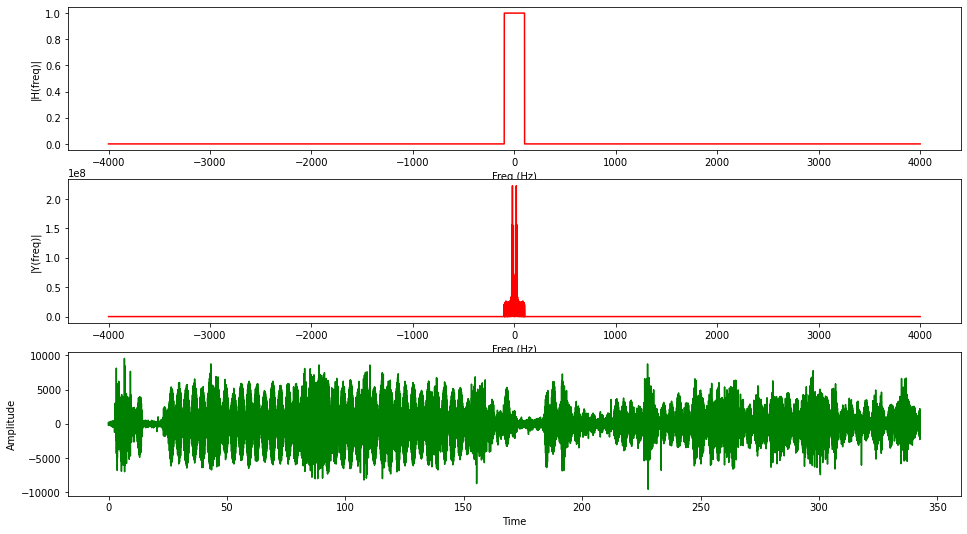



----------------------------------------------------------------------Summary----------------------------------------------------------------------
Duration = 342.7545 sec
Energy of wave (time domain) = 336325942401.028 KJouls
Power of wave (time domain) = 7665.9706754684885 Watts
Energy of wave (DS frequency domain) = 168249939848.21204 KJouls
Power of wave (DS frequency domain) = 3834.9683375831873 Watts
Bandwidth of filtered wave = 0.09999868710695227 KHz
Energy of the filtered wave (time domain) = 6461338507.037263 KJouls
Power of the filtered wave (time domain) = 147.2750842995084 Watts
Energy of the filtered wave (DS frequency domain) = 6461338507.037194 KJouls
Power of the filtered wave (DS frequency domain) = 147.27511115456716 Watts
Energy Ratio (filtered / original) = 1.9211537655733075%
---------------------------------------------------------------------------------------------------------------------------------------------------




In [ ]:
b = int(BW[1])
fc = int(FC[1])
if len(data.shape) > 1:
    data = data[:, 0]

Fs = rate
Ts = 1.0 / Fs
t = np.arange(0, len(data) * Ts, Ts)
y = [float(x) for x in data] * np.cos(2 * np.pi * fc * t)

f = open("Signal_in_text.txt", "w")
for i in range(len(y)):
    f.write(str(y[i]) + " " + str(float(t[i])) + "\n")
f.close()

with open('Signal_in_text.txt') as f:
    w = f.read()
y = []
t = []
for x in w.split('\n'):
    if x != '':
        y.append(float(x.split()[0]))
        t.append(float(x.split()[1]))

n = len(y)
k = np.arange(n)
T = n / Fs
frq = k / T
fcen = frq[int(len(frq) / 2)]
frq_DS = frq - fcen
Y = np.fft.fft(y)
yinv = np.fft.ifft(Y).real
Y_DS = np.roll(Y, int(n / 2))
fcenIndex = (np.abs(frq_DS)).argmin()
RangeIndex = (np.abs(frq_DS - BWrange)).argmin() - fcenIndex
RangeIndexMin = fcenIndex - RangeIndex

if RangeIndexMin < 0:
    RangeIndexMin = 0

RangeIndexMax = fcenIndex + RangeIndex

if RangeIndexMax > len(frq_DS) - 1:
    RangeIndexMax = len(frq_DS) - 1

fig, ax = plt.subplots(2, 1, figsize=(16, 6))
ax[0].plot(t, y)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
ax[1].plot(frq_DS[RangeIndexMin:RangeIndexMax], abs(Y_DS[RangeIndexMin:RangeIndexMax]), 'r')
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
plt.show()

y = np.array(y)
y_int = y.astype(np.int16)
yinv = np.array(yinv)
yinv_int = yinv.astype(np.int16)

fBWIndex = (np.abs(frq_DS - b)).argmin()
B = frq_DS[fBWIndex]

Mask_DS = np.ones(len(frq_DS))
Yf_DS = np.copy(Y_DS)

for cnt in range(len(frq_DS)):
    if ~(((frq_DS[cnt]) > -1 * b) and ((frq_DS[cnt]) < b)):
        Mask_DS[cnt] = 0
        Yf_DS[cnt] = Y_DS[cnt] * 0

Yf = np.roll(Yf_DS, int(n / 2))
yinv = np.fft.ifft(Yf).real
yinv = np.array(yinv)
yinv_int = yinv.astype(np.int16)

fig, ax = plt.subplots(3, 1, figsize=(16, 9))
ax[0].plot(frq_DS[RangeIndexMin:RangeIndexMax], abs(Mask_DS[RangeIndexMin:RangeIndexMax]), 'r')
ax[0].set_xlabel('Freq (Hz)')
ax[0].set_ylabel('|H(freq)|')
ax[1].plot(frq_DS[RangeIndexMin:RangeIndexMax], abs(Yf_DS[RangeIndexMin:RangeIndexMax]), 'r')
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
ax[2].plot(t, yinv, 'g')
ax[2].set_xlabel('Time')
ax[2].set_ylabel('Amplitude')
plt.show()

Energy_time = np.sum(data.astype(float) ** 2)
Power_time = 1.0 / (2 * data.size + 1) * np.sum(data.astype(float) ** 2) / rate
Energy_freq_DS = np.real(sum(Y_DS * np.conj(Y_DS))) / n
Power_freq_DS = np.real(sum(Y_DS * np.conj(Y_DS))) / (2 * (n ** 2) / Ts)
Energy_time_filtered = np.sum(yinv.astype(float) ** 2)
Power_time_filtered = 1.0 / (2 * yinv.size + 1) * np.sum(yinv.astype(float) ** 2) / rate
Energy_freq_DS_filtered = np.real(sum(Yf_DS * np.conj(Yf_DS))) / n
Power_freq_DS_filtered = np.real(sum(Yf_DS * np.conj(Yf_DS))) / (2 * (n ** 2) / Ts)

print('\n\n' + 70 * '-' + 'Summary' + 70 * '-')
print('Duration = {} sec'.format(len(y) * Ts))
print('Energy of wave (time domain) = {} KJouls'.format(Energy_time / 1000))
print('Power of wave (time domain) = {} Watts'.format(Power_time))
print('Energy of wave (DS frequency domain) = {} KJouls'.format(Energy_freq_DS / 1000))
print('Power of wave (DS frequency domain) = {} Watts'.format(Power_freq_DS))
print('Bandwidth of filtered wave = {} KHz'.format(float(B) / 1000))
print('Energy of the filtered wave (time domain) = {} KJouls'.format(Energy_time_filtered / 1000))
print('Power of the filtered wave (time domain) = {} Watts'.format(Power_time_filtered))
print('Energy of the filtered wave (DS frequency domain) = {} KJouls'.format(Energy_freq_DS_filtered / 1000))
print('Power of the filtered wave (DS frequency domain) = {} Watts'.format(Power_freq_DS_filtered))
print('Energy Ratio (filtered / original) = {}%'.format((Energy_time_filtered / Energy_time) * 100))
print(77 * '-' + 70 * '-' + '\n\n')
yinv = downsampler(yinv, 30)
Audio(yinv, rate=rate)

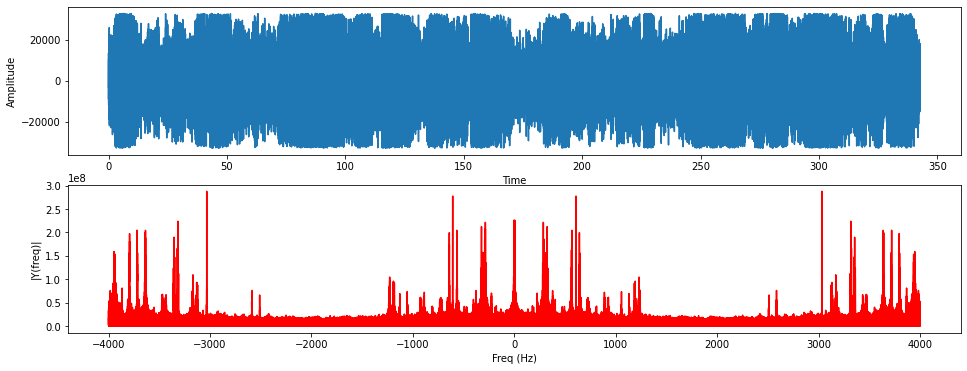

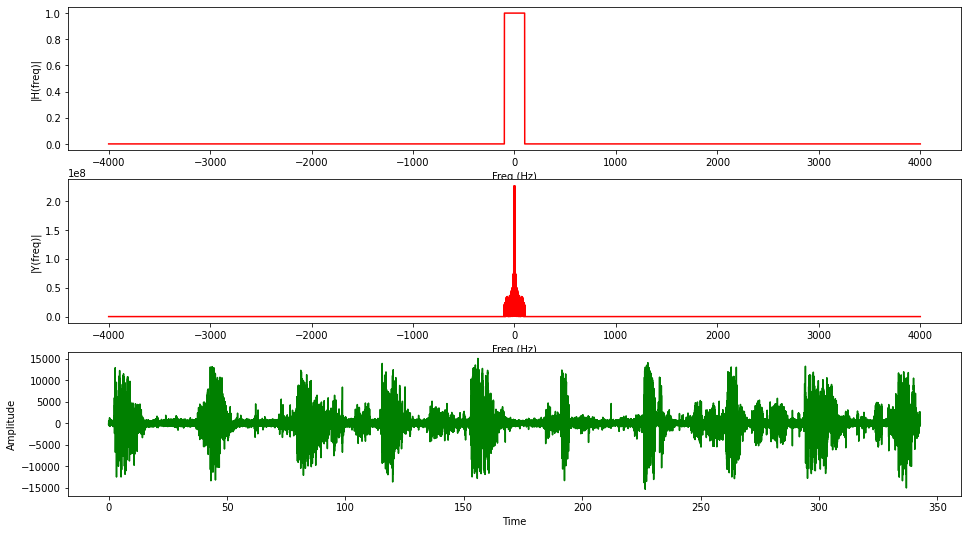



----------------------------------------------------------------------Summary----------------------------------------------------------------------
Duration = 342.7545 sec
Energy of wave (time domain) = 336325942401.028 KJouls
Power of wave (time domain) = 7665.9706754684885 Watts
Energy of wave (DS frequency domain) = 168200340005.71957 KJouls
Power of wave (DS frequency domain) = 3833.837794382522 Watts
Bandwidth of filtered wave = 0.09999868710695227 KHz
Energy of the filtered wave (time domain) = 10607544000.659788 KJouls
Power of the filtered wave (time domain) = 241.78069841201486 Watts
Energy of the filtered wave (DS frequency domain) = 10607544000.659721 KJouls
Power of the filtered wave (DS frequency domain) = 241.78074249981856 Watts
Energy Ratio (filtered / original) = 3.1539476036051886%
---------------------------------------------------------------------------------------------------------------------------------------------------




In [ ]:
b = int(BW[2])
fc = int(FC[2])
if len(data.shape) > 1:
    data = data[:, 0]

Fs = rate
Ts = 1.0 / Fs
t = np.arange(0, len(data) * Ts, Ts)
y = [float(x) for x in data] * np.cos(2 * np.pi * fc * t)

f = open("Signal_in_text.txt", "w")
for i in range(len(y)):
    f.write(str(y[i]) + " " + str(float(t[i])) + "\n")
f.close()

with open('Signal_in_text.txt') as f:
    w = f.read()
y = []
t = []
for x in w.split('\n'):
    if x != '':
        y.append(float(x.split()[0]))
        t.append(float(x.split()[1]))

n = len(y)
k = np.arange(n)
T = n / Fs
frq = k / T
fcen = frq[int(len(frq) / 2)]
frq_DS = frq - fcen
Y = np.fft.fft(y)
yinv = np.fft.ifft(Y).real
Y_DS = np.roll(Y, int(n / 2))
fcenIndex = (np.abs(frq_DS)).argmin()
RangeIndex = (np.abs(frq_DS - BWrange)).argmin() - fcenIndex
RangeIndexMin = fcenIndex - RangeIndex

if RangeIndexMin < 0:
    RangeIndexMin = 0

RangeIndexMax = fcenIndex + RangeIndex

if RangeIndexMax > len(frq_DS) - 1:
    RangeIndexMax = len(frq_DS) - 1

fig, ax = plt.subplots(2, 1, figsize=(16, 6))
ax[0].plot(t, y)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
ax[1].plot(frq_DS[RangeIndexMin:RangeIndexMax], abs(Y_DS[RangeIndexMin:RangeIndexMax]), 'r')
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
plt.show()

y = np.array(y)
y_int = y.astype(np.int16)
yinv = np.array(yinv)
yinv_int = yinv.astype(np.int16)

fBWIndex = (np.abs(frq_DS - b)).argmin()
B = frq_DS[fBWIndex]

Mask_DS = np.ones(len(frq_DS))
Yf_DS = np.copy(Y_DS)

for cnt in range(len(frq_DS)):
    if ~(((frq_DS[cnt]) > -1 * b) and ((frq_DS[cnt]) < b)):
        Mask_DS[cnt] = 0
        Yf_DS[cnt] = Y_DS[cnt] * 0

Yf = np.roll(Yf_DS, int(n / 2))
yinv = np.fft.ifft(Yf).real
yinv = np.array(yinv)
yinv_int = yinv.astype(np.int16)

fig, ax = plt.subplots(3, 1, figsize=(16, 9))
ax[0].plot(frq_DS[RangeIndexMin:RangeIndexMax], abs(Mask_DS[RangeIndexMin:RangeIndexMax]), 'r')
ax[0].set_xlabel('Freq (Hz)')
ax[0].set_ylabel('|H(freq)|')
ax[1].plot(frq_DS[RangeIndexMin:RangeIndexMax], abs(Yf_DS[RangeIndexMin:RangeIndexMax]), 'r')
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
ax[2].plot(t, yinv, 'g')
ax[2].set_xlabel('Time')
ax[2].set_ylabel('Amplitude')
plt.show()

Energy_time = np.sum(data.astype(float) ** 2)
Power_time = 1.0 / (2 * data.size + 1) * np.sum(data.astype(float) ** 2) / rate
Energy_freq_DS = np.real(sum(Y_DS * np.conj(Y_DS))) / n
Power_freq_DS = np.real(sum(Y_DS * np.conj(Y_DS))) / (2 * (n ** 2) / Ts)
Energy_time_filtered = np.sum(yinv.astype(float) ** 2)
Power_time_filtered = 1.0 / (2 * yinv.size + 1) * np.sum(yinv.astype(float) ** 2) / rate
Energy_freq_DS_filtered = np.real(sum(Yf_DS * np.conj(Yf_DS))) / n
Power_freq_DS_filtered = np.real(sum(Yf_DS * np.conj(Yf_DS))) / (2 * (n ** 2) / Ts)

print('\n\n' + 70 * '-' + 'Summary' + 70 * '-')
print('Duration = {} sec'.format(len(y) * Ts))
print('Energy of wave (time domain) = {} KJouls'.format(Energy_time / 1000))
print('Power of wave (time domain) = {} Watts'.format(Power_time))
print('Energy of wave (DS frequency domain) = {} KJouls'.format(Energy_freq_DS / 1000))
print('Power of wave (DS frequency domain) = {} Watts'.format(Power_freq_DS))
print('Bandwidth of filtered wave = {} KHz'.format(float(B) / 1000))
print('Energy of the filtered wave (time domain) = {} KJouls'.format(Energy_time_filtered / 1000))
print('Power of the filtered wave (time domain) = {} Watts'.format(Power_time_filtered))
print('Energy of the filtered wave (DS frequency domain) = {} KJouls'.format(Energy_freq_DS_filtered / 1000))
print('Power of the filtered wave (DS frequency domain) = {} Watts'.format(Power_freq_DS_filtered))
print('Energy Ratio (filtered / original) = {}%'.format((Energy_time_filtered / Energy_time) * 100))
print(77 * '-' + 70 * '-' + '\n\n')
yinv = downsampler(yinv, 30)
Audio(yinv, rate=rate)

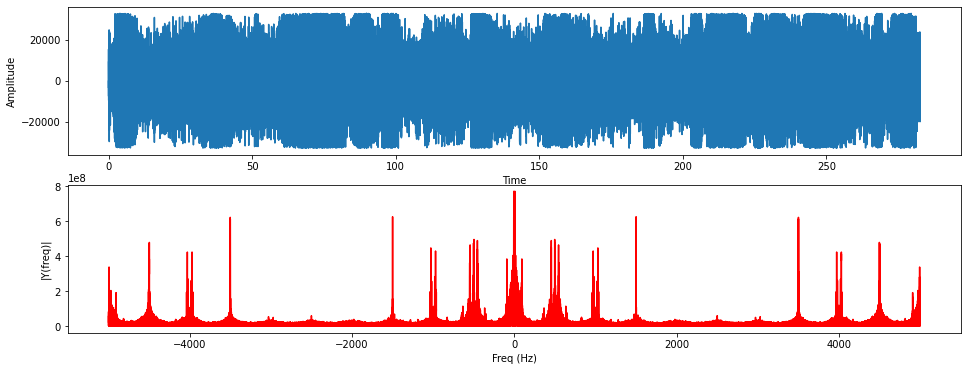

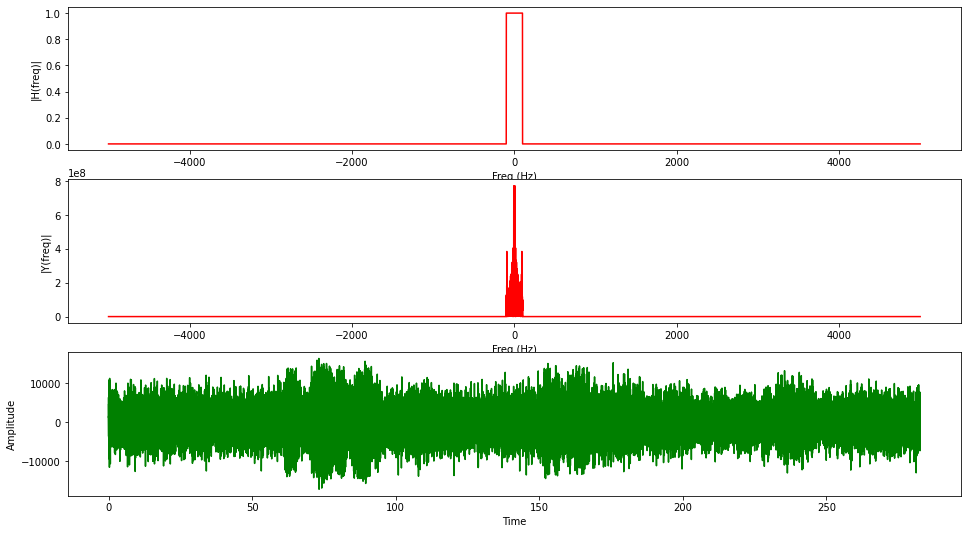



----------------------------------------------------------------------Summary----------------------------------------------------------------------
Duration = 282.6231292517007 sec
Energy of wave (time domain) = 652060014593.611 KJouls
Power of wave (time domain) = 2372.644385555886 Watts
Energy of wave (DS frequency domain) = 370999728031.4372 KJouls
Power of wave (DS frequency domain) = 1349.953183267032 Watts
Bandwidth of filtered wave = 0.09999889278287083 KHz
Energy of the filtered wave (time domain) = 83873806909.09308 KJouls
Power of the filtered wave (time domain) = 305.19079931942207 Watts
Energy of the filtered wave (DS frequency domain) = 83873806909.09271 KJouls
Power of the filtered wave (DS frequency domain) = 305.19082380583245 Watts
Energy Ratio (filtered / original) = 12.862896824208194%
---------------------------------------------------------------------------------------------------------------------------------------------------




In [ ]:
b = int(BW[3])
fc = int(FC[3])
if len(data.shape) > 1:
    data = data[:, 0]

Fs = rate
Ts = 1.0 / Fs
t = np.arange(0, len(data) * Ts, Ts)
y = [float(x) for x in data] * np.cos(2 * np.pi * fc * t)

f = open("Signal_in_text.txt", "w")
for i in range(len(y)):
    f.write(str(y[i]) + " " + str(float(t[i])) + "\n")
f.close()

with open('Signal_in_text.txt') as f:
    w = f.read()
y = []
t = []
for x in w.split('\n'):
    if x != '':
        y.append(float(x.split()[0]))
        t.append(float(x.split()[1]))

n = len(y)
k = np.arange(n)
T = n / Fs
frq = k / T
fcen = frq[int(len(frq) / 2)]
frq_DS = frq - fcen
Y = np.fft.fft(y)
yinv = np.fft.ifft(Y).real
Y_DS = np.roll(Y, int(n / 2))
fcenIndex = (np.abs(frq_DS)).argmin()
RangeIndex = (np.abs(frq_DS - BWrange)).argmin() - fcenIndex
RangeIndexMin = fcenIndex - RangeIndex

if RangeIndexMin < 0:
    RangeIndexMin = 0

RangeIndexMax = fcenIndex + RangeIndex

if RangeIndexMax > len(frq_DS) - 1:
    RangeIndexMax = len(frq_DS) - 1

fig, ax = plt.subplots(2, 1, figsize=(16, 6))
ax[0].plot(t, y)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
ax[1].plot(frq_DS[RangeIndexMin:RangeIndexMax], abs(Y_DS[RangeIndexMin:RangeIndexMax]), 'r')
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
plt.show()

y = np.array(y)
y_int = y.astype(np.int16)
yinv = np.array(yinv)
yinv_int = yinv.astype(np.int16)

fBWIndex = (np.abs(frq_DS - b)).argmin()
B = frq_DS[fBWIndex]

Mask_DS = np.ones(len(frq_DS))
Yf_DS = np.copy(Y_DS)

for cnt in range(len(frq_DS)):
    if ~(((frq_DS[cnt]) > -1 * b) and ((frq_DS[cnt]) < b)):
        Mask_DS[cnt] = 0
        Yf_DS[cnt] = Y_DS[cnt] * 0

Yf = np.roll(Yf_DS, int(n / 2))
yinv = np.fft.ifft(Yf).real
yinv = np.array(yinv)
yinv_int = yinv.astype(np.int16)

fig, ax = plt.subplots(3, 1, figsize=(16, 9))
ax[0].plot(frq_DS[RangeIndexMin:RangeIndexMax], abs(Mask_DS[RangeIndexMin:RangeIndexMax]), 'r')
ax[0].set_xlabel('Freq (Hz)')
ax[0].set_ylabel('|H(freq)|')
ax[1].plot(frq_DS[RangeIndexMin:RangeIndexMax], abs(Yf_DS[RangeIndexMin:RangeIndexMax]), 'r')
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
ax[2].plot(t, yinv, 'g')
ax[2].set_xlabel('Time')
ax[2].set_ylabel('Amplitude')
plt.show()

Energy_time = np.sum(data.astype(float) ** 2)
Power_time = 1.0 / (2 * data.size + 1) * np.sum(data.astype(float) ** 2) / rate
Energy_freq_DS = np.real(sum(Y_DS * np.conj(Y_DS))) / n
Power_freq_DS = np.real(sum(Y_DS * np.conj(Y_DS))) / (2 * (n ** 2) / Ts)
Energy_time_filtered = np.sum(yinv.astype(float) ** 2)
Power_time_filtered = 1.0 / (2 * yinv.size + 1) * np.sum(yinv.astype(float) ** 2) / rate
Energy_freq_DS_filtered = np.real(sum(Yf_DS * np.conj(Yf_DS))) / n
Power_freq_DS_filtered = np.real(sum(Yf_DS * np.conj(Yf_DS))) / (2 * (n ** 2) / Ts)

print('\n\n' + 70 * '-' + 'Summary' + 70 * '-')
print('Duration = {} sec'.format(len(y) * Ts))
print('Energy of wave (time domain) = {} KJouls'.format(Energy_time / 1000))
print('Power of wave (time domain) = {} Watts'.format(Power_time))
print('Energy of wave (DS frequency domain) = {} KJouls'.format(Energy_freq_DS / 1000))
print('Power of wave (DS frequency domain) = {} Watts'.format(Power_freq_DS))
print('Bandwidth of filtered wave = {} KHz'.format(float(B) / 1000))
print('Energy of the filtered wave (time domain) = {} KJouls'.format(Energy_time_filtered / 1000))
print('Power of the filtered wave (time domain) = {} Watts'.format(Power_time_filtered))
print('Energy of the filtered wave (DS frequency domain) = {} KJouls'.format(Energy_freq_DS_filtered / 1000))
print('Power of the filtered wave (DS frequency domain) = {} Watts'.format(Power_freq_DS_filtered))
print('Energy Ratio (filtered / original) = {}%'.format((Energy_time_filtered / Energy_time) * 100))
print(77 * '-' + 70 * '-' + '\n\n')
yinv = downsampler(yinv, 30)
Audio(yinv, rate=rate)

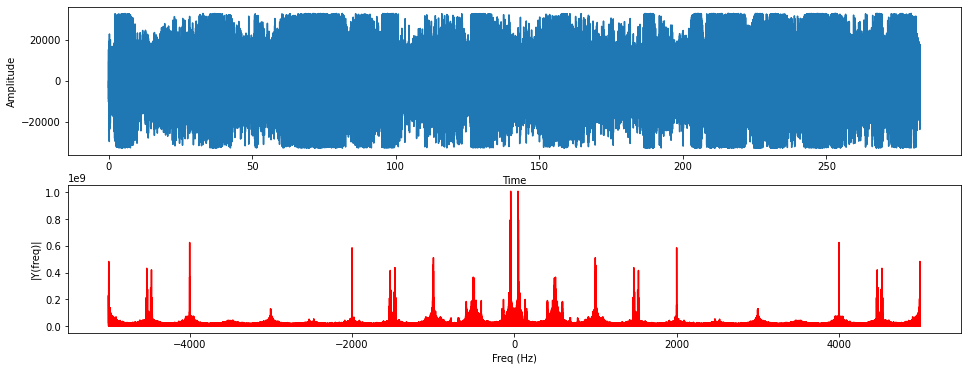

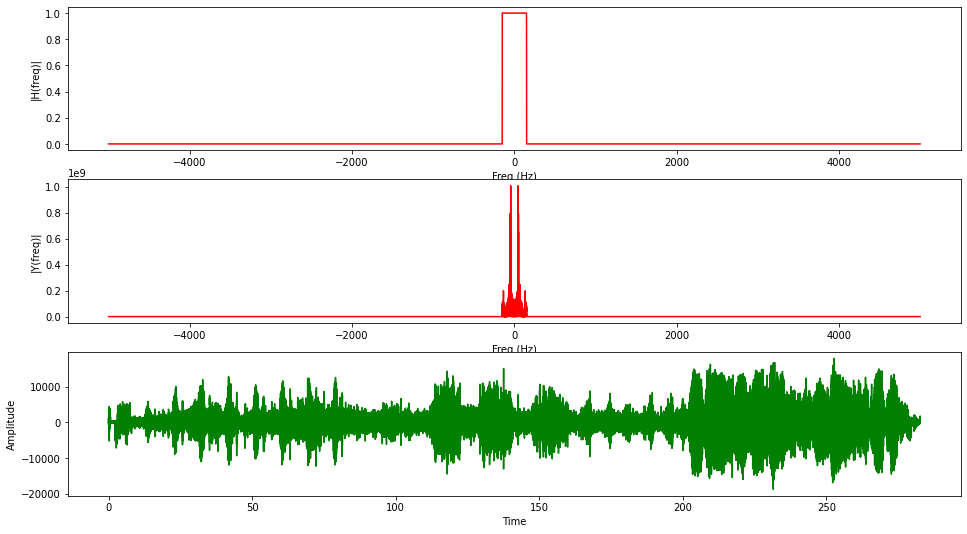



----------------------------------------------------------------------Summary----------------------------------------------------------------------
Duration = 282.6231292517007 sec
Energy of wave (time domain) = 652060014593.611 KJouls
Power of wave (time domain) = 2372.644385555886 Watts
Energy of wave (DS frequency domain) = 367305522019.5046 KJouls
Power of wave (DS frequency domain) = 1336.5111109724935 Watts
Bandwidth of filtered wave = 0.1499983391743044 KHz
Energy of the filtered wave (time domain) = 63886711555.39696 KJouls
Power of the filtered wave (time domain) = 232.46395130977587 Watts
Energy of the filtered wave (DS frequency domain) = 63886711555.3979 KJouls
Power of the filtered wave (DS frequency domain) = 232.46396996108868 Watts
Energy Ratio (filtered / original) = 9.797673546232339%
---------------------------------------------------------------------------------------------------------------------------------------------------




In [ ]:
b = int(BW[4])
fc = int(FC[4])
if len(data.shape) > 1:
    data = data[:, 0]

Fs = rate
Ts = 1.0 / Fs
t = np.arange(0, len(data) * Ts, Ts)
y = [float(x) for x in data] * np.cos(2 * np.pi * fc * t)

f = open("Signal_in_text.txt", "w")
for i in range(len(y)):
    f.write(str(y[i]) + " " + str(float(t[i])) + "\n")
f.close()

with open('Signal_in_text.txt') as f:
    w = f.read()
y = []
t = []
for x in w.split('\n'):
    if x != '':
        y.append(float(x.split()[0]))
        t.append(float(x.split()[1]))

n = len(y)
k = np.arange(n)
T = n / Fs
frq = k / T
fcen = frq[int(len(frq) / 2)]
frq_DS = frq - fcen
Y = np.fft.fft(y)
yinv = np.fft.ifft(Y).real
Y_DS = np.roll(Y, int(n / 2))
fcenIndex = (np.abs(frq_DS)).argmin()
RangeIndex = (np.abs(frq_DS - BWrange)).argmin() - fcenIndex
RangeIndexMin = fcenIndex - RangeIndex

if RangeIndexMin < 0:
    RangeIndexMin = 0

RangeIndexMax = fcenIndex + RangeIndex

if RangeIndexMax > len(frq_DS) - 1:
    RangeIndexMax = len(frq_DS) - 1

fig, ax = plt.subplots(2, 1, figsize=(16, 6))
ax[0].plot(t, y)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
ax[1].plot(frq_DS[RangeIndexMin:RangeIndexMax], abs(Y_DS[RangeIndexMin:RangeIndexMax]), 'r')
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
plt.show()

y = np.array(y)
y_int = y.astype(np.int16)
yinv = np.array(yinv)
yinv_int = yinv.astype(np.int16)

fBWIndex = (np.abs(frq_DS - b)).argmin()
B = frq_DS[fBWIndex]

Mask_DS = np.ones(len(frq_DS))
Yf_DS = np.copy(Y_DS)

for cnt in range(len(frq_DS)):
    if ~(((frq_DS[cnt]) > -1 * b) and ((frq_DS[cnt]) < b)):
        Mask_DS[cnt] = 0
        Yf_DS[cnt] = Y_DS[cnt] * 0

Yf = np.roll(Yf_DS, int(n / 2))
yinv = np.fft.ifft(Yf).real
yinv = np.array(yinv)
yinv_int = yinv.astype(np.int16)

fig, ax = plt.subplots(3, 1, figsize=(16, 9))
ax[0].plot(frq_DS[RangeIndexMin:RangeIndexMax], abs(Mask_DS[RangeIndexMin:RangeIndexMax]), 'r')
ax[0].set_xlabel('Freq (Hz)')
ax[0].set_ylabel('|H(freq)|')
ax[1].plot(frq_DS[RangeIndexMin:RangeIndexMax], abs(Yf_DS[RangeIndexMin:RangeIndexMax]), 'r')
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
ax[2].plot(t, yinv, 'g')
ax[2].set_xlabel('Time')
ax[2].set_ylabel('Amplitude')
plt.show()

Energy_time = np.sum(data.astype(float) ** 2)
Power_time = 1.0 / (2 * data.size + 1) * np.sum(data.astype(float) ** 2) / rate
Energy_freq_DS = np.real(sum(Y_DS * np.conj(Y_DS))) / n
Power_freq_DS = np.real(sum(Y_DS * np.conj(Y_DS))) / (2 * (n ** 2) / Ts)
Energy_time_filtered = np.sum(yinv.astype(float) ** 2)
Power_time_filtered = 1.0 / (2 * yinv.size + 1) * np.sum(yinv.astype(float) ** 2) / rate
Energy_freq_DS_filtered = np.real(sum(Yf_DS * np.conj(Yf_DS))) / n
Power_freq_DS_filtered = np.real(sum(Yf_DS * np.conj(Yf_DS))) / (2 * (n ** 2) / Ts)

print('\n\n' + 70 * '-' + 'Summary' + 70 * '-')
print('Duration = {} sec'.format(len(y) * Ts))
print('Energy of wave (time domain) = {} KJouls'.format(Energy_time / 1000))
print('Power of wave (time domain) = {} Watts'.format(Power_time))
print('Energy of wave (DS frequency domain) = {} KJouls'.format(Energy_freq_DS / 1000))
print('Power of wave (DS frequency domain) = {} Watts'.format(Power_freq_DS))
print('Bandwidth of filtered wave = {} KHz'.format(float(B) / 1000))
print('Energy of the filtered wave (time domain) = {} KJouls'.format(Energy_time_filtered / 1000))
print('Power of the filtered wave (time domain) = {} Watts'.format(Power_time_filtered))
print('Energy of the filtered wave (DS frequency domain) = {} KJouls'.format(Energy_freq_DS_filtered / 1000))
print('Power of the filtered wave (DS frequency domain) = {} Watts'.format(Power_freq_DS_filtered))
print('Energy Ratio (filtered / original) = {}%'.format((Energy_time_filtered / Energy_time) * 100))
print(77 * '-' + 70 * '-' + '\n\n')
yinv = downsampler(yinv, 30)
Audio(yinv, rate=rate)